# **Clustering**

In this task K-Means clustering will be used to cluster players based on their

 Experiment 1: Overall and phsyic




In [1]:
import pandas as pd
import io
from google.colab import files
from sklearn import model_selection


uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['fifa20.csv'].decode('utf-8')))


Saving fifa20.csv to fifa20.csv


**Selecting Features**

Select Features will be used for this task

In [0]:
#Selecting features will be used, in this case column number 10 is overall and column number 11 is potential
X = df.iloc[:, [10, 11]].values
row=X.shape[0] 
column=X.shape[1] 
# Initializing the iteration of how many times K Means algorithm will be implemented
n_iter=100

**Function to Initialized Centroids**

Initialized centroids randomly from the dataset

In [0]:
# Initializing the first clusters center point by randomly choose it from the dataset
def centroid(K):
  import numpy as np
  import random as rd
  Centroids=[]
  rand=[]
  for i in range(K):
    rand.append(rd.randint(0,row-1))
  Centroids=(X[rand])
  return Centroids

**K Means Function**

K means Algortihm

In [0]:
def Kmeans(n_iter,row,Centroids,KK,X):
  import math 
  import numpy as np
  Output={}
 #Iterate through KMeans iteration
  for i in range(n_iter):
    Output.clear()
    #Iterate through all the data points
    for j in range(row):
      min_dist=10000
      #Iterate through the centroids
      for c in range(KK):
        # Calculating the euclidean distance from the data point to each centroid
        dist = math.sqrt((Centroids[:,0][c]-X[j][0])**2+(Centroids[:,1][c]-X[j][1])**2) 
        if min_dist>dist:
          min_dist=dist
          c_temp=c
      #Assigning each data point into nearest cluster center point calculated with euclidean distance
      Output.setdefault(c_temp,[]).append(list(X[j]))
    for k in range(KK):
      #Calculating updated center point by calculating mean from data points in the same cluster
      Centroids[k]=np.mean(Output[k],axis=0)

  for kk in range(KK):
    Output[kk]=np.array(Output[kk])
  return Output,Centroids




**Calculating Within Cluster Sum of Square**

Sum of squares of distances of every data point from its corresponding cluster centroid.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
WCSS_final=[]
idx = 6 #Number of cluster we want to show in graph
for i in range(idx):
  Centroid = centroid(i+1)
  KK=i+1
  Output,Centroids = Kmeans(n_iter,row,Centroid,KK,X)
  WCSS=[]
  for z in range(len(Centroids)):
    sum_elbow=0
    for zz in range(len(Output[z])):
      #Calculate euclidean distance of all data points to its cluster center point 
      sum_elbow=((Centroids[:,0][z]-Output[z][zz][0])**2+(Centroids[:,1][z]-Output[z][zz][1])**2)+sum_elbow
    WCSS.append(sum_elbow)
  #sum all squares of distances of every data point from its corresponding cluster centroid.
  WCSS_final.append(sum(WCSS))

**Elbow Method in Graph**

Find the minimum Sum of squares of distances of every data point from its corresponding cluster centroid to find the appropriate number of clusters.

[1578338, 776184, 596386, 495019, 354956, 346421]
[1, 2, 3, 4, 5, 6]


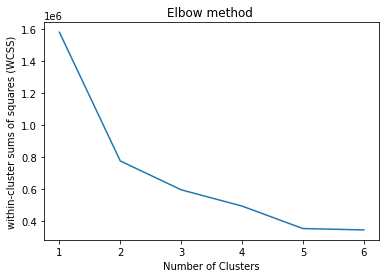

In [6]:
number=[]
print(WCSS_final)
for f in range(len(WCSS_final)):
  number.append(f+1)
print(number)
#plot the number of cluster(1-10) with its WCSS
plt.plot(number,WCSS_final)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method ')
plt.show()


**Show Clustering Result**

Plot the result in a 2 dimentional graph

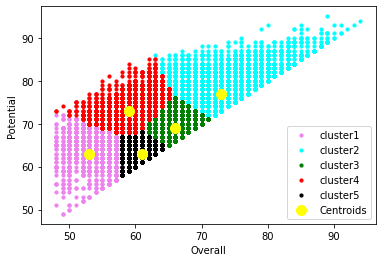

In [13]:
color=['violet','cyan','green','red','black','blue','pink','grey','purple','brown']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8','cluster9','cluster10']
Kluster=5
Centroid = centroid(Kluster)
Output,Centroids = Kmeans(n_iter,row,Centroid,Kluster,X)
#Plot the data points based on their cluster
for k in range(Kluster):
    plt.scatter(Output[k][:,0],Output[k][:,1],c=color[k],label=labels[k],s=10)
#Plot the centroids
plt.scatter(Centroids[:,0],Centroids[:,1],s=100,c='yellow',label='Centroids')
plt.xlabel('Overall')
plt.ylabel('Potential')
plt.legend()
plt.show()


In [0]:
from google.colab import files

#Collecting the explored data in a dataframe
temp=[]
frames=[]
conc = np.vstack(Output)
for idxx in range(len(conc)):
  p=(Output[conc[idxx][0]]).tolist()
  for l in range(len(p)):
    p[l].append(conc[idxx][0]+1)
  temp.append(p)

for v in range( len(temp)):
  temp2=(pd.DataFrame(temp[v], columns = ['Overall', 'Potential','Cluster']))
  frames.append(temp2)
result = pd.concat(frames,ignore_index = True)

#Download the explored data
result.to_csv('fifa20_Kmeans_2.csv')
files.download("fifa20_Kmeans_2.csv")